In [4]:
import librosa
import numpy as np
import os
import matplotlib.pyplot as plt
import Process_Data.constants as c
from scipy import interpolate

from Misc.analysis import format_eer_file, read_eer_file, format_eer_file_train, format_eer_file_eval
%matplotlib inline

/tmp/ipykernel_3479308/3819890022.py:2: FutureWarning: Pass sr=16000, n_fft=400 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melfb = librosa.filters.mel(16000, 400)


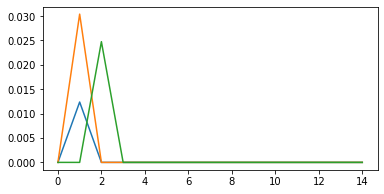

In [12]:
# Plot triangle filters
melfb = librosa.filters.mel(16000, 400)
plt.figure(figsize=(6,3))
for i,x in enumerate(melfb):
    if i<3:
        plt.plot(x[:15])

plt.show()

In [13]:
format_eer_file('data/loresnet.txt')

#|     vox1-test     |   4.19±0.08  | 0.3688±0.0158 | 0.5157±0.0103 | LoResNet-8-chn16
#|   vox1-test-mel   |   4.27±0.07  | 0.3742±0.0120 | 0.4820±0.0467 | LoResNet-8-chn16-mel
#|  vox1-test-clean  |   4.09±0.02  | 0.3620±0.0045 | 0.5199±0.0123 | LoResNet-8-chn16-clean
#|   vox1-test-aug   |   4.15±0.09  | 0.3530±0.0207 | 0.5044±0.0375 | LoResNet-8-chn16-aug
#|  vox1-test-vox2   |   4.00±0.08  | 0.3698±0.0067 | 0.4834±0.0219 | LoResNet-8-chn16-vox2
#|     vox1-test     |   3.51±0.14  | 0.3259±0.0120 | 0.4080±0.0359 | LoResNet-8-chn32
#|   vox1-test-mel   |   3.26±0.12  | 0.3195±0.0081 | 0.4053±0.0321 | LoResNet-8-chn32-mel
#|  vox1-test-clean  |   3.38±0.08  | 0.3192±0.0160 | 0.3971±0.0204 | LoResNet-8-chn32-clean
#|   vox1-test-aug   |   3.33±0.04  | 0.3177±0.0018 | 0.4027±0.0188 | LoResNet-8-chn32-aug
#|  vox1-test-vox2   |   3.37±0.08  | 0.3002±0.0029 | 0.4035±0.0423 | LoResNet-8-chn32-vox2
#|     vox1-test     |   4.19±0.06  | 0.3669±0.0166 | 0.5137±0.0044 | LoResNet-8-chn16-kd+em

In [14]:
format_eer_file('data/test_resnet_220711.log') 

#|     vox1-test     |   5.16±0.07  | 0.4481±0.0179 | 0.6074±0.0292 | ResNet-8-chn16
#|     vox1-test     |   5.12±0.10  | 0.4621±0.0071 | 0.5449±0.0284 | ResNet-8-chn16-attention(rclean)-vox1
#|  vox1-test-rcle   |   5.16±0.02  | 0.4637±0.0093 | 0.5872±0.0136 | chn16-attention3(rclean)-vox1
#|  vox1-test-vox2   |   5.14±0.03  | 0.4767±0.0115 | 0.6072±0.0224 | ResNet-8-chn16-attention(vox2_rclean)-vox1
#|     sitw-test     |   9.69±0.20  | 0.6813±0.0016 | 0.8779±0.0069 | ResNet-8-chn16-attention(rclean)-sitw
#|  sitw-test-rcle   |   9.47±0.17  | 0.6814±0.0082 | 0.8835±0.0187 | ResNet-8-chn16-attention3(rclean)-sitw
#|  sitw-test-vox2   |   9.53±0.11  | 0.6822±0.0101 | 0.8696±0.0194 | ResNet-8-chn16-attention(vox2_rclean)-sitw
#|     vox1-test     |   4.31±0.05  | 0.4005±0.0137 | 0.4999±0.0095 | ResNet-8-chn32
#|     vox1-test     |   4.01±0.06  | 0.3653±0.0092 | 0.4315±0.0262 | ResNet-8-chn64
#|     vox1-test     |   4.24±0.07  | 0.3889±0.0162 | 0.5185±0.0525 | ResNet-10
#|  vox1-test-

In [15]:
format_eer_file('data/test_resnet_sitw_20220713.txt')

#|     sitw-test     |   9.84±0.04  | 0.6933±0.0020 | 0.8924±0.0067 | ResNet-8-chn16
#|     sitw-test     |   8.40±0.11  | 0.6035±0.0068 | 0.7976±0.0112 | ResNet-8-chn32
#|     sitw-test     |   7.97±0.27  | 0.5486±0.0070 | 0.7329±0.0127 | ResNet-8-chn64
#|     sitw-test     |   8.24±0.17  | 0.5871±0.0075 | 0.7768±0.0057 | ResNet-10
#|     sitw-test     |   6.97±0.17  | 0.5203±0.0099 | 0.7152±0.0083 | ResNet-18
#|     sitw-test     |   6.27±0.09  | 0.4681±0.0061 | 0.6555±0.0072 | ResNet-34


In [16]:
format_eer_file('data/tdnn_slimmable.txt')

#|     vox1-test     |   4.73±0.05  | 0.4881±0.0154 | 0.5986±0.0136 | TDNN_v5-vox1-klfb40
#|     vox1-test     |   5.01±0.10  | 0.5041±0.0418 | 0.6068±0.0700 | SlimmableTDNN-1.0-vox1-klfb40
#|     vox1-test     |   5.00±0.16  | 0.4716±0.0230 | 0.5766±0.0314 | SlimmableTDNN-0.75-vox1-klfb40
#|     vox1-test     |   4.93±0.14  | 0.4987±0.0354 | 0.6291±0.0250 | SlimmableTDNN-0.5-vox1-klfb40
#|     vox1-test     |   5.44±0.22  | 0.5182±0.0244 | 0.6418±0.0057 | SlimmableTDNN-0.25-vox1-klfb40


In [17]:
format_eer_file('data/lores_es.txt')

#|     vox1-test     |   3.31±0.12  | 0.3185±0.0173 | 0.4072±0.0169 | LoResNet-8-chn64


In [18]:
# print(result_lst[0], result_lst[-1])
eval_str = ['EER', 'MinDCF08', 'MinDCF10']
set_sets = ['v1', 'sitw']

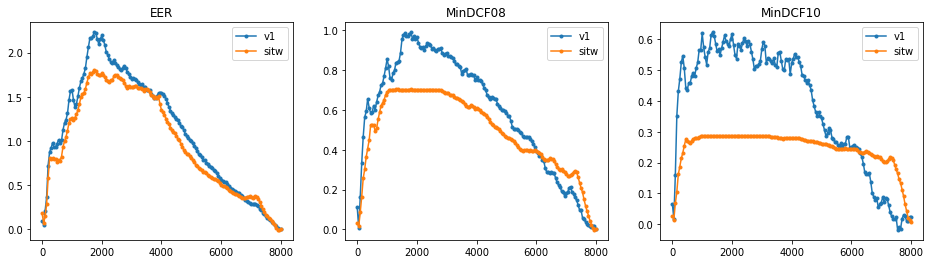

In [19]:
result_idx, result_lst = read_eer_file('data/freq_mask.txt')

# baseline ResNet-34-avg5-vox1 klsp
norm_eer = np.array([4.24, 0.3889, 0.5185])
norm_sitw_eer = np.array([8.24, 0.5871, 0.7768])

x = np.arange(161) * 8000 / (161 - 1)

plt.figure(figsize=(16, 4))
for i in range(3):
    plt.subplot(1,3,int(i+1))
    
    plt.title(eval_str[i])
    eer_lift = (result_lst[:161, i]-norm_eer[i])/norm_eer[i]
    plt.plot(x, eer_lift, marker = '.')
    
    eer_lift = (result_lst[161:, i]-norm_sitw_eer[i])/norm_sitw_eer[i]
    plt.plot(x, eer_lift, marker = '.')
    
    plt.legend(set_sets)

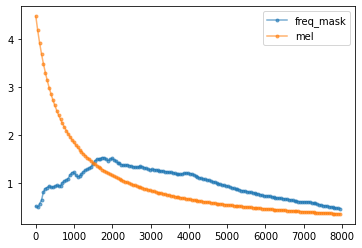

In [21]:
perb_weight = result_lst[:161, 0]
perb_weight /= perb_weight.mean()

input_dim=len(perb_weight)

m = np.arange(0, 2840.0230467083188)
m = 700 * (10 ** (m / 2595.0) - 1)
n = np.array([1/(m[i] - m[i - 1]) for i in range(1, len(m))])
# x = np.arange(input_dim) * 8000 / (input_dim - 1)  # [0-8000]
f = interpolate.interp1d(m[1:], n)
xnew = np.arange(np.min(m[1:]), np.max(
    m[1:]), (np.max(m[1:]) - np.min(m[1:])) / input_dim)
ynew = f(xnew)

plt.figure(figsize=(6, 4))

plt.plot(np.arange(input_dim)/input_dim*8000,  perb_weight, marker='.', alpha=0.6)
plt.plot(xnew, ynew/ynew.mean(), marker='.', alpha=0.6)

plt.legend(['freq_mask', 'mel'])

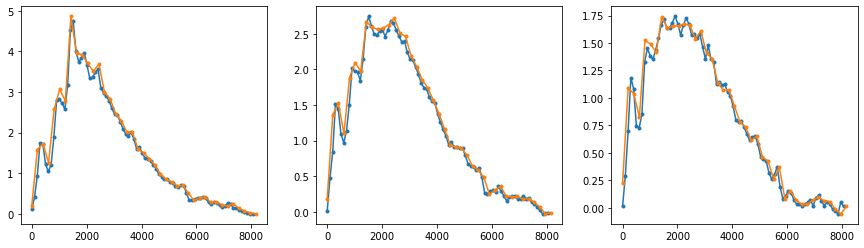

In [22]:
plt.figure(figsize=(15, 4))

# baseline ResNet-34-avg5-vox2 klsp
#|     vox1-test     |  2.08±0.09  |             | 0.1965±0.0011 | 0.3089±0.0059 |
norm_eer = np.array([2.08, 0.1965, 0.3089])
#|     sitw-test     |  3.27±0.13  |             | 0.2661±0.0100 | 0.4016±0.0047 |
norm_sitw_eer = np.array([3.27, 0.2661, 0.4016])

for mask_len in [2, 4]:
    result_idx, result_lst = read_eer_file('data/freq_mask%d.txt'%mask_len)
    x = np.arange(161/mask_len) * 8000 / (161/mask_len - 1)
    
    for i in range(3):
        plt.subplot(1, 3, int(i+1))
        # plt.title(eval_str[i])
        eer_lift = (result_lst[:161, i]-norm_eer[i])/norm_eer[i]
        plt.plot(x, eer_lift, marker = '.')

In [26]:
perb_weight = result_lst[:161, 0]
perb_weight /= perb_weight.sum()

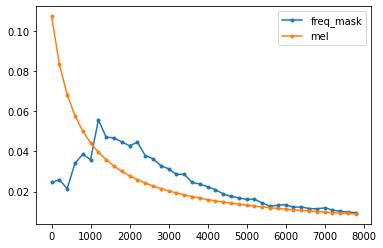

In [27]:
from scipy import interpolate
input_dim=40

m = np.arange(0, 2840.0230467083188)
m = 700 * (10 ** (m / 2595.0) - 1)
n = np.array([1/(m[i] - m[i - 1]) for i in range(1, len(m))])
# x = np.arange(input_dim) * 8000 / (input_dim - 1)  # [0-8000]
f = interpolate.interp1d(m[1:], n)
xnew = np.arange(np.min(m[1:]), np.max(
    m[1:]), (np.max(m[1:]) - np.min(m[1:])) / input_dim)
ynew = f(xnew)

plt.figure(figsize=(6,4))

plt.plot(np.arange(40)/40*8000,  perb_weight[1:], marker='.')
plt.plot(xnew, ynew/ynew.sum(), marker='.')

plt.legend(['freq_mask', 'mel'])

In [28]:
format_eer_file('data/resnet_fb40.txt')

#|     vox1-test     |   3.60±0.06  | 0.3696±0.0070 | 0.5131±0.0304 | ResNet-50-chn16
#|     vox1-test     |   3.66±0.08  | 0.3703±0.0248 | 0.4460±0.0231 | ResNet-34-chn16
#|     vox1-test     |   3.89±0.05  | 0.3967±0.0145 | 0.4850±0.0160 | ResNet-18-chn16
#|     vox1-test     |   4.25±0.10  | 0.3914±0.0040 | 0.5287±0.0207 | ResNet-10-chn16


In [29]:
format_eer_file('data/aidata.txt')

#|    aidata-test    |   5.33±0.14  | 0.4665±0.0047 | 0.7887±0.0031 | resnet18_seblcok_red2_astp2-wav-fb40-baseline
#|    aidata-test    |   5.86±0.13  | 0.4554±0.0058 | 0.7793±0.0189 | resnet18_seblcok_red2_astp2-wav-fb40-mixup0_0.2
#|    aidata-test    |   5.23±0.16  | 0.4232±0.0072 | 0.7721±0.0056 | resnet18_seblcok_red2_astp2-wav-fb40-clean+half_mixup0_0.2
#|    aidata-test    |   5.14±0.02  | 0.4364±0.0147 | 0.7679±0.0181 | resnet18_seblcok_red2_astp2-wav-fb40-clean+half_mixup0_0.5
#|    aidata-test    |   5.10±0.05  | 0.4776±0.0072 | 0.8081±0.0163 | resnet34_seblcok_red2_k3_astp2-fb40-baseline-server
#|    aidata-test    |   5.62±0.11  | 0.4920±0.0089 | 0.8166±0.0216 | resnet34_seblcok_red2_k3_astp2-fb40-clean+half_mixup0_0.2
#|    aidata-test    |  14.07±11.67  | 0.6608±0.2378 | 0.8756±0.0876 | resnet34_seblcok_red2_k3_astp2-fb40-clean+half_mixup0_0.5
#|    aidata-test    |  20.70±10.64  | 0.8335±0.2329 | 0.9335±0.0931 | resnet34_seblcok_red2_k3_astp2-fb40-clean+half_mixup0_1
#|

In [30]:
format_eer_file('data/resnet_klsp.txt')

# baseline resnet 10: 2.15897
# attention amel :    2.003474
# attention mel :     1.969065  ==>> attention with weight make performance better

#|     vox1-test     |   2.08±0.09  | 0.1965±0.0011 | 0.3089±0.0059 | ResNet34-teacher-Mean_batch256_basic_downk1_avg5_SAP2_em256_dp01_alpha0_none1_wde5_var
#|     vox1-test     |   3.75±0.04  | 0.3624±0.0090 | 0.4668±0.0187 | ResNet18-baseline-batch128_basic_downk1_avg4_SAP2_em256_dp01_alpha0_none1
#|     vox1-test     |   3.59±0.03  | 0.3571±0.0121 | 0.4826±0.0274 | attention-mel_mean
#|     vox1-test     |   3.70±0.08  | 0.3426±0.0203 | 0.4623±0.0587 | ResNet18-baseline-mix2
#|     vox1-test     |   3.55±0.02  | 0.3497±0.0070 | 0.4450±0.0365 | attention-amel_mean-mix2
#|     vox1-test     |   3.73±0.08  | 0.3532±0.0177 | 0.4486±0.0195 | attention-v2_rclean_gax-mix2
#|     vox1-test     |   3.58±0.12  | 0.3414±0.0088 | 0.4582±0.0248 | attention-v2_rclean_gean-mix2
#|     vox1-test     |   4.18±0.07  | 0.4039±0.0090 | 0.5165±0.0224 | ResNet10-baseline-mix2
#|   cnceleb-test    |  15.62±0.31  | 0.7659±0.0055 | 0.9390±0.0081 | ResNet10-baseline-mix2
#|   aishell2-test   |   9.29±0.18  |

In [42]:
plot_model_names = ['ResNet10-baseline-mix2',
 'ResNet10-attention-mel_mean-mix2',
 'ResNet10-attention-v2_rclean_gean_mean-mix2',
 'ResNet10-attention-v2_rclean_gean_norm-mix2',
 'ResNet10-attention-v2_fratio_mean-mix2',
 'ResNet10-drop-mel_max-mix2-scale0.5']

plot_model_names_offset = np.arange(0, 1+1/(len(plot_model_names)-1), 1/(len(plot_model_names)-1))
plot_model_names_offset -= plot_model_names_offset.mean()
plot_model_names_offset *= 1

model_offset = {}
for i,j in zip(plot_model_names, plot_model_names_offset):
    model_offset[i] = j

In [43]:
x = ['vox1', 'aishell2']#, 'cnceleb', 'magic']

with open('data/aidata_types.txt' , 'r') as f:
    model_dict = {}
    for l in f.readlines(): #|     vox1-test     |   4.18±0.07  | 0.4039±0.0090 | 0.5165±0.0224 | ResNet10-baseline-mix2
        lst = l.split()
        set_name = lst[1].split('-')[0]
        eer = lst[3].split('±')[0]
        dcf08 = lst[5].split('±')[0]
        dcf10 = lst[7].split('±')[0]
        model_name = lst[-1]
        
        if model_name not in model_dict:
            model_dict[model_name] = {}
        
        model_dict[model_name][set_name] = [float(eer), float(dcf08), float(dcf10)]

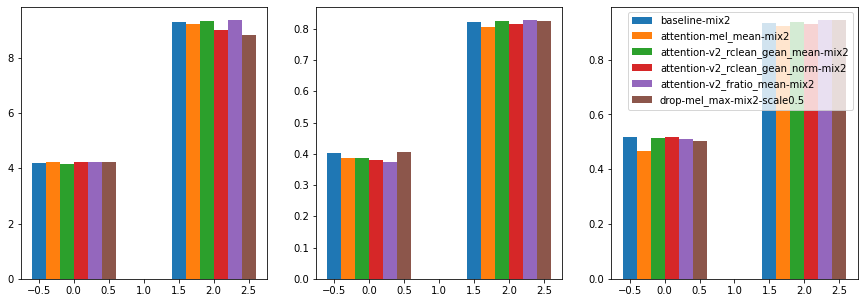

In [44]:
plt.figure(figsize=(15, 5))

model_names = []
x = ['vox1', 'aishell2']#, 'cnceleb']#, 'magic']
x_dict = {'vox1': 0, 'aishell2': 2, 'cnceleb': 4, 'magic': 6}
# x = ['aishell2']#, 'cnceleb']#, 'magic']

for m_name in model_dict:
    model_names.append(m_name)
    sets = model_dict[m_name]
    if m_name in plot_model_names:
        for i in range(3):
            plt.subplot(1, 3, int(i+1))
            plt.bar([x_dict[i]+model_offset[m_name] for i in x], [sets[s][i] for s in x], width=0.2)
    
plt.legend([i.lstrip('ResNet10-') for i in plot_model_names])
# attention v2_rclean_gean norm should be better one.

In [45]:
format_eer_file('data/resnet_fb40_at.txt')

#|     vox1-test     |   3.66±0.08  | 0.3703±0.0248 | 0.4460±0.0231 | batch256_seblock_red2_downk3_avg5_ASTP2_em256_dp01_alpha0_none1_wd5e4_vares
#|     vox1-test     |   3.53±0.06  | 0.3544±0.0158 | 0.4628±0.0317 | batch128_seblock_red2_downk3_avg5_ASTP2_em256_dp01_alpha0_none1_chn32_wd5e4_varesmix2_bashuf2_dist
#|     vox1-test     |   4.25±0.10  | 0.3914±0.0040 | 0.5287±0.0207 | ResNet-10-chn16-baseline
#|     vox1-test     |   4.05±0.04  | 0.3961±0.0076 | 0.4839±0.0299 | ResNet-10-chn16-Student-attention_transfer-1000
#|     vox1-test     |   4.09±0.05  | 0.3876±0.0100 | 0.5330±0.0131 | ResNet-10-chn16-Student-attention_transfer-1000-frequency
#|     vox1-test     |   4.26±0.04  | 0.4033±0.0139 | 0.4873±0.0125 | ResNet-10-chn16-Student-attention_transfer-1000-time
#|     vox1-test     |   3.89±0.05  | 0.3967±0.0145 | 0.4850±0.0160 | ResNet-18-chn16-baseline


In [46]:
format_eer_file('data/resnet_fb80.txt')

#|     vox1-test     |   4.16±0.08  | 0.3981±0.0078 | 0.4637±0.0178 | resnet10-seblock-kernel7,7
#|     vox1-test     |   3.39±0.12  | 0.3470±0.0116 | 0.4240±0.0195 | resnet34-seblock-kernel7,7
#|     vox1-test     |   3.28±0.12  | 0.3277±0.0104 | 0.4310±0.0343 | resnet34-cbam-SAP2-baseline
#|     vox1-test     |   3.04±0.08  | 0.2988±0.0032 | 0.4056±0.0144 | resnet34-cbam-SAP2-mixup-123-aplha=2.0


In [47]:
format_eer_file('data/vox2_ecapa.txt')

#|     vox1-test     |   2.04±0.07  | 0.2173±0.0054 | 0.3082±0.0339 | ECAPA-klfb40-vox2-Mean_batch256_SASP2_em192_wde5_2sesmix2_dist
#|     sitw-test     |   3.51±0.13  | 0.3003±0.0112 | 0.4495±0.0121 | ECAPA-klfb40-vox2-Mean_batch256_SASP2_em192_wde5_2sesmix2_dist
#|     vox1-test     |   1.98±0.06  | 0.2063±0.0110 | 0.3055±0.0407 | ECAPA-klfb40-vox2-Mean_batch256_SASP2_em192_wde5_2sesmix2_dist-manifold-[1,2]
#|     sitw-test     |   3.23±0.03  | 0.2905±0.0063 | 0.4470±0.0074 | ECAPA-klfb40-vox2-Mean_batch256_SASP2_em192_wde5_2sesmix2_dist-manifold-[1,2]
#|     vox1-test     |   1.78±0.07  | 0.1794±0.0090 | 0.2871±0.0287 | ECAPA-wave-fb80-vox2-Mean_batch128_SASP2_em192_wde5_2sesmix2_dist
#|     sitw-test     |   3.08±0.13  | 0.2794±0.0077 | 0.4376±0.0193 | ECAPA-wave-fb80-vox2-Mean_batch128_SASP2_em192_wde5_2sesmix2_dist


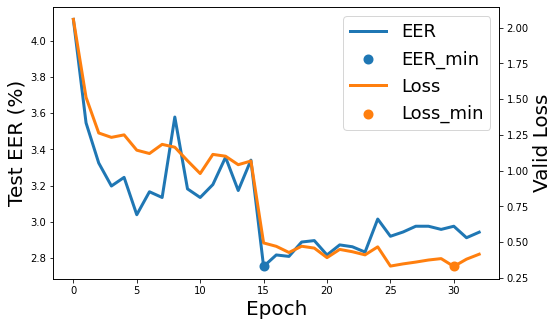

In [48]:
with open('data/v2_tdnn.txt', 'r') as f:
    EER = []
    Valid_loss = []
    for l in f.readlines():
        if 'EER' in l:
            EER.append(float(l.split()[2].rstrip('%,')))
        
        if 'Valid' in l:
            Valid_loss.append(float(l.split()[-1].rstrip('.')))

cs = [u'b', u'g', u'r', u'c', u'm', u'y', u'k']
# plt.figure(figsize=(12, 6))
fig, ax1 = plt.subplots()
fig.set_size_inches(8, 5)

ax1.plot(EER, c='C0', linewidth=3)
ax1.scatter([15], [2.7519], linewidth=4)
ax1.set_ylabel('Test EER (%)', fontsize=20)
ax1.set_xlabel('Epoch', fontsize=20)
# ax1.legend('EER')

ax2 = ax1.twinx()
ax2.plot(Valid_loss, c='C1', linewidth=3)
ax2.scatter([30], [0.330426], c='C1', linewidth=4)

ax2.set_ylabel('Valid Loss', fontsize=20)
fig.legend(['EER', 'EER_min', 'Loss', 'Loss_min'], fontsize=18, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

Text(0.5, 0, 'Epoch')

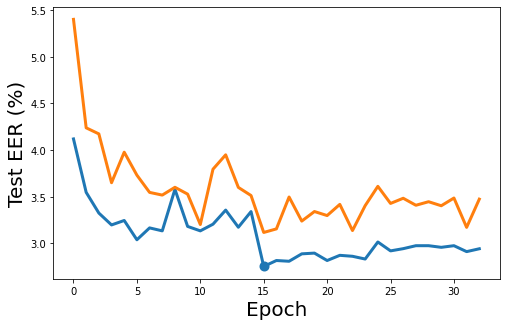

In [49]:
with open('data/v2_tdnn.txt', 'r') as f:
    EER = []
    MinDCF10 = []
    for l in f.readlines():
        if 'EER' in l:
            EER.append(float(l.split()[2].rstrip('%,')))
            MinDCF10.append(float(l.split()[8].rstrip(',')))
        
        # if 'Valid' in l:
        #     Valid_loss.append(float(l.split()[-1].rstrip('.')))

cs = [u'b', u'g', u'r', u'c', u'm', u'y', u'k']
# plt.figure(figsize=(12, 6))

linear = (np.array(EER) + 10 * np.array(MinDCF10))/2 

fig, ax1 = plt.subplots()
fig.set_size_inches(8, 5)

ax1.plot(EER, c='C0', linewidth=3)
ax1.plot(linear, c='C1', linewidth=3)

ax1.scatter([15], [2.7519], linewidth=4)
ax1.set_ylabel('Test EER (%)', fontsize=20)
ax1.set_xlabel('Epoch', fontsize=20)
# ax1.legend('EER')

# ax2 = ax1.twinx()
# ax2.plot(Valid_loss, c='C1', linewidth=3)
# ax2.scatter([30], [0.330426], c='C1', linewidth=4)

# ax2.set_ylabel('Valid Loss', fontsize=20)
# fig.legend(['EER', 'EER_min', 'Loss', 'Loss_min'], fontsize=18, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

In [50]:
linear = (np.array(EER) + 10 * np.array(MinDCF10))/2 
multi = np.array(EER) * np.array(MinDCF10)

In [51]:
# for max_idx in np.argsort(linear)[:8]:
#     print(EER[max_idx], MinDCF10[max_idx])
    
# for max_idx in np.argsort(multi)[:8]:
#     print(EER[max_idx], MinDCF10[max_idx])

Text(0.5, 0, 'Epoch')

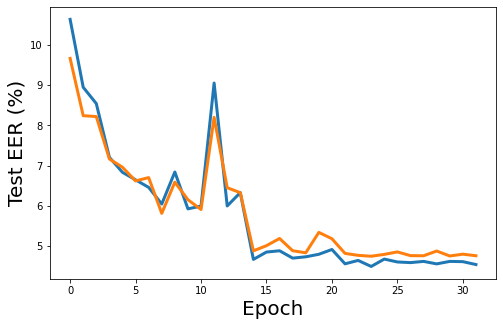

In [52]:
with open('data/klsp_train.txt', 'r') as f:
    EER = []
    MinDCF10 = []
    for l in f.readlines():
        if 'EER' in l:
            EER.append(float(l.split()[2].rstrip('%,')))
            MinDCF10.append(float(l.split()[8].rstrip(',')))
        
        # if 'Valid' in l:
        #     Valid_loss.append(float(l.split()[-1].rstrip('.')))

cs = [u'b', u'g', u'r', u'c', u'm', u'y', u'k']
# plt.figure(figsize=(12, 6))

linear = (np.array(EER) + 10 * np.array(MinDCF10))/2 

fig, ax1 = plt.subplots()
fig.set_size_inches(8, 5)

ax1.plot(EER, c='C0', linewidth=3)
ax1.plot(linear, c='C1', linewidth=3)
# ax1.scatter([15], [2.7519], linewidth=4)
ax1.set_ylabel('Test EER (%)', fontsize=20)
ax1.set_xlabel('Epoch', fontsize=20)
# ax1.legend('EER')

# ax2 = ax1.twinx()
# ax2.plot(Valid_loss, c='C1', linewidth=3)
# ax2.scatter([30], [0.330426], c='C1', linewidth=4)

# ax2.set_ylabel('Valid Loss', fontsize=20)
# fig.legend(['EER', 'EER_min', 'Loss', 'Loss_min'], fontsize=18, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

In [53]:
linear = (np.array(EER) + 10 * np.array(MinDCF10))/2 
multi = np.array(EER) * np.array(MinDCF10)

In [ ]:
num_max = 8
for max_eer, max_dcf in zip(np.argsort(linear)[:num_max],np.argsort(multi)[:num_max]):
    print(EER[max_eer], '/' , EER[max_dcf], ' ',   MinDCF10[max_eer], '/' , MinDCF10[max_dcf])

81


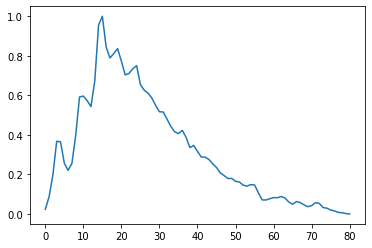

In [55]:
plt.figure(figsize=(6, 4))
plt.plot(c.V2_EER)
print(len(c.V2_EER))

In [56]:
x = np.arange(0, 8000+8000/(len(c.V2_EER)-1), 8000/(len(c.V2_EER)-1))
f = interpolate.interp1d(x, c.V2_EER)

xnew = np.arange(0, 8000+8000/160, 8000/160)
cnew = f(xnew)

In [57]:
x = np.arange(0, 8000+8000/(len(c.V2_EER)-1), 8000/(len(c.V2_EER)-1))

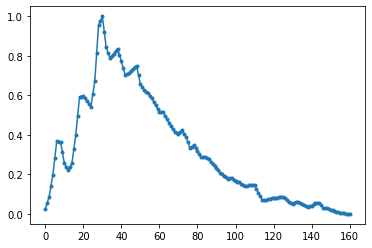

In [59]:
plt.figure(figsize=(6, 4))
plt.plot(cnew, marker='.')

In [60]:
# cnew/cnew.max()

In [61]:
format_eer_file_train('data/cnc_domain.txt')

# baseline
# + domain sample re-weight
# + kurtoses relaxtion
# + 2*kurtoses relaxtion
# + domain sample re-weight & 2*kurtoses relaxtion

#| 12.96±0.54 | 0.7102±0.0188 | 0.7475±0.0110 | 9.6842±0.4167 | 6.8714±0.1929 | ThinResNet18-cnceleb_v2-cbam_downk1_avg5_SAP2_em256_dp01_none1_wde4
#| 11.72±1.06 | 0.7040±0.0133 | 0.7493±0.0201 | 9.2360±0.8501 | 6.5290±0.6030 | domain-weight4
#| 11.94±0.61 | 0.6880±0.0032 | 0.7371±0.0104 | 9.0924±0.7956 | 6.3715±0.5806 | kurtoses
#| 11.18±0.48 | 0.6886±0.0256 | 0.7316±0.0419 | 8.8666±0.8708 | 6.1930±0.6902 | kurtoses*2
#| 11.40±0.50 | 0.6985±0.0082 | 0.7587±0.0143 | 8.8216±0.7966 | 6.1622±0.6339 | kurtoses*2-domain


In [3]:
results_40 = format_eer_file_eval('data/vox1_clsaug.txt', log=False)

In [32]:
results = format_eer_file_eval('data/vox1_clsaug_128.txt', log=True)

#| 11.65±0.10 | 0.7656±0.0158 | 0.8312±0.0144 | 9.6848±0.2301 | 7.4172±0.3050 | Mean_batch64_cbam_downk1_avg4_SAP2_em128_dp01_alpha1_none1_wd5e4_mix2_dist_128-baseline
#| 14.33±0.60 | 0.8081±0.0127 | 0.8950±0.0043 | 11.2541±1.6165 | 8.8922±1.5387 | mixup-manifold1
#| 12.32±0.01 | 0.7867±0.0166 | 0.8542±0.0116 | 11.0108±1.3663 | 8.6886±1.2992 | mixup-manifold1-clsaug
#| 12.97±0.31 | 0.7923±0.0093 | 0.8628±0.0178 | 11.0554±1.1956 | 8.7319±1.1299 | mixup-manifold2
#| 12.11±0.16 | 0.7440±0.0035 | 0.8324±0.0082 | 10.8605±1.1407 | 8.4856±1.1266 | mixup-manifold2-lamdba=0.2
#| 12.07±0.10 | 0.7429±0.0265 | 0.8571±0.0207 | 10.7745±1.0674 | 8.3527±1.0852 | mixup-manifold2-lamdba=0.2-mix_ratio=0.5
#| 12.04±0.20 | 0.7553±0.0155 | 0.8371±0.0162 | 10.6750±1.0253 | 8.2476±1.0480 | mixup-manifold2-lamdba=0.2-mix_ratio=0.75
#| 12.03±0.11 | 0.7734±0.0140 | 0.8997±0.0191 | 10.6933±0.9614 | 8.2631±0.9850 | mixup-manifold2-clsaug
#| 12.87±0.14 | 0.7881±0.0038 | 0.8571±0.0093 | 10.7313±0.9163 | 8.3112±0.940

In [33]:
models = ['baseline', 
          r'mixup-manifold[1-9]', 
          r'mixup-manifold[1-9]-clsaug', 
          r'mixup-manifold[1-9]-lamdba=0.2', 
          r'mixup-manifold[1-9]-lamdba=0.2-mix_ratio=0.5', 
          r'mixup-manifold[1-9]-lamdba=0.2-mix_ratio=0.75']

layers = [i for i in range(9)]

# for l in results:
#     if 'baseline' in l[0]:
#         plt.plot(layers, [l[7]]*len(layers), marker='.')
        
#     # elif models[-1] in l[0]:   

In [45]:
import re

models = ['baseline', 
          r'mixup-manifold[1-9]$', 
          r'mixup-manifold[1-9]-clsaug', 
          r'mixup-manifold[1-9]-lamdba=0.2', 
          r'mixup-manifold[1-9]-lamdba=0.2-mix_ratio=0.5', 
          r'mixup-manifold[1-9]-lamdba=0.2-mix_ratio=0.75']

result_type = {}
eval_type = {'eer':1, 'mindcf08': 2, 'mindcf10': 3, 'mix2': 4, 'mix3': 5,}
eval_index = eval_type['eer']

for l in results:
    if models[0] in l[0]:
        result_type[models[0]]=[[i, l[eval_index]] for i in range(9)]

    elif re.match(models[1], l[0]) != None:
        if l[0][:-1] not in result_type:
            result_type[l[0][:-1]]=[[int(l[0][-1]), l[eval_index]]]
        else:
            result_type[l[0][:-1]].append([int(l[0][-1]), l[eval_index]])
    
    else:
        this_type = l[0].split('-')[-1]
        if this_type not in result_type:
            result_type[this_type]=[[int(l[0][14]), l[eval_index]]]
        else:
            result_type[this_type].append([int(l[0][14]), l[eval_index]])

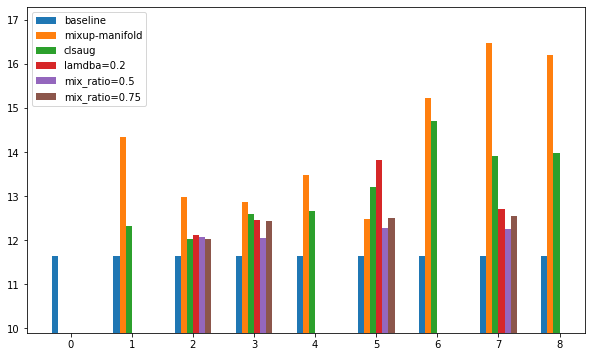

In [55]:
plt.figure(figsize=(10, 6))

types = list(result_type.keys())
x = np.array([i*0.1 for i in range(len(types))])-0.25
max_y,min_y = 0,100

for i, this_type in enumerate(types):
    r = np.array(result_type[this_type])
    plt.bar(r[:, 0]+x[i], r[:, 1], width=0.1)
    max_y = max(max_y, np.max(r[:, 1]))
    min_y = min(min_y, np.min(r[:, 1]))
    # plt.plot(r[:, 0], r[:, 1], marker='.')

plt.ylim([min_y*0.85, max_y*1.05])
plt.xticks(np.arange(9))
plt.legend(types)

In [1]:
import torchaudio
import soundfile as sf

In [20]:
sa, sr = torchaudio.load('/home/yangwenhao/storage/dataset/voxceleb1/voxceleb1_wav/vox1_dev_wav/wav/id10001/1zcIwhmdeo4/00001.wav')

In [21]:
sa.dtype

torch.float32

In [96]:
import time

In [104]:
dur1 = 0
numofiter = 1000
for i in range(numofiter):
    start = time.time()
    audio, sample_rate = sf.read('/home/yangwenhao/storage/dataset/voxceleb1/voxceleb1_wav/vox1_dev_wav/wav/id10001/1zcIwhmdeo4/00001.wav', dtype='int16', stop=48000)
    audio = audio.reshape(1, -1)
    dur1 += time.time() - start
    
print(dur1)

0.05967545509338379


In [105]:
dur1 = 0
numofiter = 1000
for i in range(numofiter):
    start = time.time()
    audio, sample_rate = sf.read('/home/yangwenhao/storage/dataset/voxceleb1/voxceleb1_wav/vox1_dev_wav/wav/id10001/1zcIwhmdeo4/00001.wav', dtype='int16')
    audio = audio.reshape(1, -1)
    dur1 += time.time() - start
    
print(dur1)

0.06882834434509277


In [2]:
audio, sample_rate = sf.read('/home/yangwenhao/storage/dataset/voxceleb1/voxceleb1_wav/vox1_dev_wav/wav/id10001/1zcIwhmdeo4/00001.wav', dtype='int16')

print(audio.shape)


(129921,)


In [94]:
audio.shape

(1, 48000)

In [33]:
sa

tensor([[ 0.0703,  0.0703,  0.0916,  ..., -0.0863, -0.1171, -0.1537]])

In [36]:
import kaldiio

In [85]:
feat_ark = 'data/test_int16.ark'
feat_scp = 'data/int16.scp'

for cm in [1,2,3,4]:
    with kaldiio.WriteHelper('ark,scp:%s,%s' % (feat_ark, feat_scp), compression_method=cm) as writer:
        for i in range(1):
            # feat = np.random.randint(-32768, 32767, 129921, dtype='int16').reshape(1, -1)
            feat = audio
            writer(str(i), feat)

    with kaldiio.ReadHelper('scp:%s'%feat_scp) as reader:
        for i, n in reader:
            feat = n.astype(np.int16) - audio
            print((feat>0.32).sum()/feat.shape[1])
        


0.2604813694475874
0.3950015778819436
0.2604813694475874
0.0020704889894628273


In [43]:
np.random.randint(-32768, 32767, 121, dtype='int16')

array([2813, 1518, 5337, 3694, 6688, 5732, 4530, 5974, 2710, 8832,   96,
        778, 8347,  307, 7468, 3074, 4715, 1933, 5009, 8910, 7348, 5126,
       3201,  320, 7329, 4673, 2182, 6894, 2557, 6396, 6897, 6243, 1413,
       7405, 3593, 2798, 8455, 3681, 5780, 5393, 4978, 1643, 8519, 6181,
       5358,  506, 2347, 8225, 8694,  712,  934, 3942,  267, 5718, 5651,
       4164, 4136, 7506, 3382, 1338, 6317, 6779, 5857, 5525, 7834, 1258,
       3492, 7889, 6010, 6521, 1398, 4640, 3830, 8945, 2396, 1247, 2069,
          6, 5178, 7625, 6878, 2408, 8275, 2702,  936, 5795, 2007, 3689,
       4204, 5250, 7027, 2450, 5721, 2238, 3380, 7641, 5377, 8106, 3627,
       8958, 6061, 5231,   26, 3096, 1980, 3885, 8869, 7888, 4615, 7227,
       8423, 4802,   29, 5332, 8518, 5603, 3139, 5901,  296, 2118, 8672],
      dtype=int16)

In [90]:
feat_ark = 'data/test_float32.ark'
feat_scp = 'data/float32.scp'

for cm in [1,2,3,4,5,6,7]:
    with kaldiio.WriteHelper('ark,scp:%s,%s' % (feat_ark, feat_scp), compression_method=cm) as writer:
        for i in range(1):
            # feat = np.random.randint(-32768, 32767, 129921, dtype='int16').reshape(1, -1)
            feat = sa.numpy()
            writer(str(i), feat)

    with kaldiio.ReadHelper('scp:%s'%feat_scp) as reader:
        for i, n in reader:
            feat = n.astype(np.float32) - sa.numpy()
            print((feat>1e-6).sum()/feat.shape[1])

0.4234650287482393
0.4234650287482393
0.4234650287482393
0.5231563796460926
0.4986799670569038
0.5231563796460926
0.7575526666204847


In [54]:
import torch

In [56]:
torchaudio.save( 'data/test.wav', torch.FloatTensor(np.random.randn(1, 1600000).reshape(1, -1))@, sample_rate=16000)

In [107]:
results = format_eer_file_eval('data/aidata_floatint.txt', log=True)

#|  6.90±0.08 | 0.6484±0.0204 | 0.8394±0.0239 | 5.7884±0.1566 | 3.7544±0.1834 | float
#|  6.29±0.06 | 0.5781±0.0161 | 0.8752±0.0130 | 5.6467±0.1944 | 3.4689±0.3274 | float-wav-file
#|  6.63±0.16 | 0.6357±0.0177 | 0.8999±0.0384 | 5.7550±0.3148 | 3.5792±0.3576 | int
#|  6.11±0.06 | 0.5967±0.0212 | 0.8737±0.0180 | 5.6508±0.3308 | 3.4810±0.3619 | int-wav-file


In [109]:
a = np.arange(14)
b = np.arange(5)

In [110]:
len(a)/len(b)

2.8